In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [16]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy import create_engine, func
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session

In [17]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [18]:
# reflect an existing database into a new model
from sqlalchemy import create_engine, MetaData
from sqlalchemy.orm import declarative_base

In [27]:
Base = automap_base()
Base.prepare(engine, reflect=True)
measurement = Base.classes.measurement


/var/folders/7g/thp811pn5dbbwflfnhytf9kr0000gn/T/ipykernel_8068/1077093935.py:2: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


In [33]:
# Get the classes from the reflected tables
classes = Base.classes

# Print the class names
for class_name in classes.keys():
    print(class_name)

station
measurement


# Exploratory Precipitation Analysis

In [28]:
#  Find the most recent date in the data set.
session = Session(engine)
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23',)

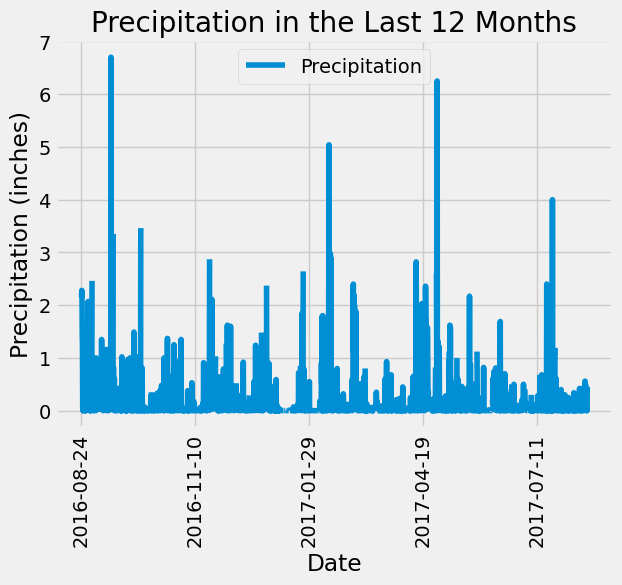

In [29]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in the data set.
last_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
one_year_ago = dt.datetime.strptime(last_date[0], '%Y-%m-%d') - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
results = session.query(measurement.date, measurement.prcp).filter(measurement.date >= one_year_ago).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(results, columns=['Date', 'Precipitation'])

# Sort the dataframe by date
df = df.sort_values('Date')

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(x='Date', y='Precipitation', rot=90)
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')
plt.title('Precipitation in the Last 12 Months')
plt.show()


In [30]:
# Use Pandas to calculate the summary statistics for the precipitation data
pd.DataFrame(df.describe())

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [35]:
station = Base.classes.station

# Design a query to calculate the total number of stations in the dataset
session.query(func.count(station.station)).all()

[(9,)]

In [36]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [37]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).filter(measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

/var/folders/7g/thp811pn5dbbwflfnhytf9kr0000gn/T/ipykernel_8068/1208205345.py:6: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


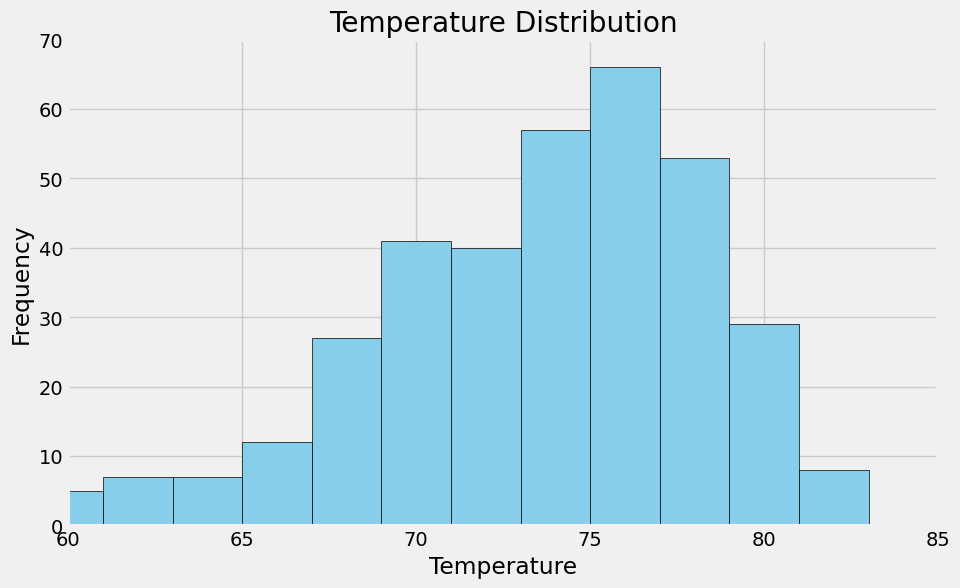

In [51]:
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
# Using the most active station id
Base = automap_base()
Base.prepare(engine, reflect=True)
Measurement = Base.classes.measurement

# Rest of the code
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

# Query to find the station with the most observations
station_counts = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

most_active_station = station_counts[0][0]

# Query to get the previous 12 months of TOBS data for the most active station
results = session.query(Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= '2016-08-23').filter(Measurement.date <= '2017-08-23').all()

temperatures = [result[0] for result in results]

# Plot the results as a histogram with 12 bins
plt.figure(figsize=(10, 6))
plt.hist(temperatures, bins=12, color='skyblue', edgecolor='black')
plt.xlabel('Temperature')
plt.xlim(60,85)
plt.ylabel('Frequency')
plt.ylim(0,70)
plt.title('Temperature Distribution')
plt.show()


# Close Session

In [52]:
# Close Session
session.close()